# **Project Introduction**

For the sole purpose of this project, our group decided to collect data via a google forms survey that we first distributed to our surrounding circles and in the coming month will additionally distribute to many others around campus and the greater Chicago Area. The form consists of 7 questions, which will be extended to 8 before the form is advertised on campus. The questions are as follows.


---




###1.   What are you sharing info about?




*   Breakup
*   New Relationship/Situationship
*   Both
---
###2.   What month did you start your new relationship/situationship?


*   N/A

*   January

*   February

*   March

*   April

*   May
*   June


*   July


*   August


*   September


*   October


*   November

*   December

---
###3. What month was your last breakup?

*   N/A

*   January

*   February

*   March

*   April

*   May
*   June


*   July


*   August


*   September


*   October


*   November

*   December
---
###4. How long was your last relationship/situationship before it ended?
* N/A
* Less than 3 months
* 3 - 6 months
* 6 - 9 months
* 9 months - 1.5 years
* 1.5 - 2.5 years
* 2.5 - 4 years
* 4+ years
---
###5. How long are you currently in this new relationship/situationship?
* N/A
* Less than 3 months
* 3 - 6 months
* 6 - 9 months
* 9 months - 1.5 years
* 1.5 - 2.5 years
* 2.5 - 4 years
* 4+ years
---
###6. How satisfied did you feel about your last relationship/situationship breakup?
* N/A
* Strongly Dissatisfied
* Somewhat Unsatisfied
* Neutral
* Somewhat Satisfied
* Strongly Satisfied
---
###7. How satisfied do you feel about your new relationship/situationship?
* N/A
* Strongly Dissatisfied
* Somewhat Unsatisfied
* Neutral
* Somewhat Satisfied
* Strongly Satisfied
---
The question that will be added before broad dissemination of the survey will be...
###8. How old are you?
with a set of age buckets for the responders to categorize themselves into.








---
# **Changes from the Proposal Phase**

####The only change that we are planning to implement in addition to what we covered in the proposal is the additional query of how old the responders are, which we could then use to make judgements/hypotheses on how age correlates to satisfaction with both relationships and breakups, as well as if there are any age specific ties to season of breakup or the start of their relationship.


---
# **Data Cleaning**

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# colab-specific file access
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/PROGRESS REPORT
#Load the CSV FILE
monthTranslationTable = {'January': 1, 'February':2, 'March':3, 'April': 4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12, 'Currently Single':0, 0:0}
timeTranslationTable =  {'Less than 3 months':1, '3 - 6 months':2,'6 - 9 months':3,'9 months to a 1.5 years':4,'1.5 to 2.5 years':5,'2.5 to 4 years':6,'4+ years':7, 0:0}
satisfactionTranslationTable = {'Strongly Unsatisfied':1, 'Somewhat Unsatisfied':2, 'Neutral':3,'Somewhat Satisfied':4,'Strongly Satisfied':5,0:0}

def monthTranslator(toTranslate):
  return monthTranslationTable[toTranslate]
def timeTranslator(toTranslate):
  return timeTranslationTable[toTranslate]
def satisfactionTranslator(toTranslate):
   return satisfactionTranslationTable[toTranslate]

survey_responses = pd.read_csv('Cycle of Love (Responses) - Form Responses 1.csv')
love_pruned = survey_responses[['What month did you start your new relationship/situationship?','How long are you currently in this new relationship/situationship?','How satisfied do you feel with your new relationship/situationship?']]

new_love_data = love_pruned.rename(columns = {'What month did you start your new relationship/situationship?': 'relationship_start', 'How long are you currently in this new relationship/situationship?': 'relationship_length','How satisfied do you feel with your new relationship/situationship?': 'relationship_satisfaction'})
new_love_data = new_love_data.fillna(0)
new_love_data['relationship_start'] = new_love_data['relationship_start'].map(monthTranslator)
new_love_data = new_love_data[new_love_data['relationship_start'] != 0]
new_love_data['relationship_length'] = new_love_data['relationship_length'].map(timeTranslator)
new_love_data = new_love_data[new_love_data['relationship_length'] != 0]
new_love_data['relationship_satisfaction'] = new_love_data['relationship_satisfaction'].map(satisfactionTranslator)
new_love_data = new_love_data[new_love_data['relationship_satisfaction'] != 0]

display(survey_responses)
display(new_love_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/PROGRESS REPORT


,Timestamp,What are you sharing info about?,What month did you start your new relationship/situationship?,What month was your last breakup?,How long was your last relationship/situationship before it ended?,How long are you currently in this new relationship/situationship?,How satisfied did you feel about how your last relationship/situationship breakup?,How satisfied do you feel with your new relationship/situationship?
0,10/25/2023 20:46:40,Both,October,August,9 months to a 1.5 years,Less than 3 months,Somewhat Satisfied,Somewhat Unsatisfied
1,10/25/2023 20:47:51,New Relationship/situationship,October,August,Less than 3 months,Less than 3 months,Strongly Unsatisfied,Strongly Satisfied
2,10/25/2023 20:53:37,Both,Currently Single,October,9 months to a 1.5 years,Less than 3 months,Strongly Satisfied,Strongly Satisfied
3,10/25/2023 20:54:09,Breakup,July,December,1.5 to 2.5 years,NaN,Strongly Unsatisfied,NaN
4,10/25/2023 20:55:38,Breakup,Currently Single,August,3 - 6 months,NaN,Somewhat Unsatisfied,NaN
5,10/25/2023 20:59:18,Breakup,April,August,1.5 to 2.5 years,NaN,Neutral,NaN
6,10/25/2023 21:38:03,Breakup,Currently Single,November,Less than 3 months,NaN,Strongly Unsatisfied,NaN
7,10/25/2023 22:10:55,New Relationship/situationship,September,March,3 - 6 months,2.5 to 4 years,Strongly Satisfied,Strongly Satisfied
8,10/25/2023 22:12:59,Both,September,September,2.5 to 4 years,Less than 3 months,Strongly Satisfied,Strongly Satisfied
9,10/25/2023 22:13:41,Both,September,July,1.5 to 2.5 years,Less than 3 months,Somewhat Satisfied,Strongly Satisfied


,relationship_start,relationship_length,relationship_satisfaction
0,10,1,2
1,10,1,5
7,9,6,5
8,9,1,5
9,9,1,5
10,9,1,5
12,11,5,5
13,7,2,5
14,9,2,5


In [131]:
hate_pruned = survey_responses[['What month was your last breakup?','How long was your last relationship/situationship before it ended?','How satisfied did you feel about how your last relationship/situationship breakup?']]

new_hate_data = hate_pruned.rename(columns = {'What month was your last breakup?': 'breakup_start', 'How long was your last relationship/situationship before it ended?': 'breakup_length','How satisfied did you feel about how your last relationship/situationship breakup?': 'breakup_satisfaction'})
new_hate_data = new_hate_data.fillna(0)
new_hate_data['breakup_start'] = new_hate_data['breakup_start'].map(monthTranslator)
new_hate_data = new_hate_data[new_hate_data['breakup_start'] != 0]
new_hate_data['breakup_length'] = new_hate_data['breakup_length'].map(timeTranslator)
new_hate_data = new_hate_data[new_hate_data['breakup_length'] != 0]
new_hate_data['breakup_satisfaction'] = new_hate_data['breakup_satisfaction'].map(satisfactionTranslator)
new_hate_data = new_hate_data[new_hate_data['breakup_satisfaction'] != 0]

display(new_hate_data)


,breakup_start,breakup_length,breakup_satisfaction
0,8,4,4
1,8,1,1
2,10,4,5
3,12,5,1
4,8,2,2
5,8,5,3
6,11,1,1
7,3,2,5
8,9,6,5
9,7,5,4


---
# **Exploratory Data Analysis**


First a bit of exploration into the viability of and distribution of responses.

In [132]:
hate_count = new_hate_data.shape[0]
love_count = new_love_data.shape[0]
total_count = survey_responses.shape[0]
unusableDFHate = new_hate_data.index.values.tolist()
unusableDFLove = new_love_data.index.values.tolist()
usable_list = list(set(unusableDFLove + unusableDFHate))
hate_percent = float(hate_count / total_count)
love_percent = float(love_count / total_count)
unusable_percent = float((total_count - len(usable_list)) / total_count)

print("Percent of respondees that provided valid data on their breakups is: ", hate_percent)
print("Percent of respondees that provided valid data on their new relationships is: ", love_percent)
print("Percent of respondees that provided data that is impossible to parse without resurveying is: ", unusable_percent)


Percent of respondees that provided valid data on their breakups is:  0.9375
Percent of respondees that provided valid data on their new relationships is:  0.5625
Percent of respondees that provided data that is impossible to parse without resurveying is:  0.0


Next we can compute the modes and means of the two tables we have constructed.

In [133]:
#Reverse translator dicts
reverseMonthTable = {1:'January', 2:'February', 3:'March',  4:'April', 5:'May', 6:'June', 7:'July', 8:'August',9: 'September', 10:'October', 11:'November', 12:'December'}
reverseTimeTable =  {1:'Less than 3 months', 2:'3 - 6 months',3:'6 - 9 months',4:'9 months to a 1.5 years',5:'1.5 to 2.5 years',6:'2.5 to 4 years',7:'4+ years'}
reverseSatisfactionTable = {1:'Strongly Unsatisfied', 2:'Somewhat Unsatisfied', 3:'Neutral',4:'Somewhat Satisfied',5:'Strongly Satisfied'}
#Translator Functions to go from number to presentation names
def monthReverser(toReverse):
  return reverseMonthTable[toReverse]
def lengthReverser(toReverse):
  return reverseTimeTable[toReverse]
def satisfactionReverser(toReverse):
  return reverseSatisfactionTable[toReverse]

#MODES
hate_start_mode = monthReverser(new_hate_data['breakup_start'].mode()[0])
hate_length_mode = lengthReverser(new_hate_data['breakup_length'].mode()[0])
hate_satisfaction_mode = satisfactionReverser(new_hate_data['breakup_satisfaction'].mode()[0])
love_start_mode = monthReverser(new_love_data['relationship_start'].mode()[0])
love_length_mode = lengthReverser(new_love_data['relationship_length'].mode()[0])
love_satisfaction_mode = satisfactionReverser(new_love_data['relationship_satisfaction'].mode()[0])
#MEANS
hate_start_mean = new_hate_data['breakup_start'].mean()
hate_length_mean = new_hate_data['breakup_length'].mean()
hate_satisfaction_mean = new_hate_data['breakup_satisfaction'].mean()
love_start_mean = new_love_data['relationship_start'].mean()
love_length_mean = new_love_data['relationship_length'].mean()
love_satisfaction_mean = new_love_data['relationship_satisfaction'].mean()

print("Breakup Data:")
print("Breakup Start-- Mode: ", hate_start_mode," Mean: ", hate_start_mean )
print("Breakup Length-- Mode: ", hate_length_mode," Mean: ", hate_length_mean )
print("Breakup Satisfaction-- Mode: ", hate_satisfaction_mode," Mean: ", hate_satisfaction_mean )
print("Relationship Data:")
print("Relationship Start-- Mode: ", love_start_mode," Mean: ", love_start_mean )
print("Relationship Length-- Mode: ", love_length_mode," Mean: ", love_length_mean )
print("Relationship Satisfaction-- Mode: ", love_satisfaction_mode," Mean: ", love_satisfaction_mean )

Breakup Data:
Breakup Start-- Mode:  August  Mean:  7.8
Breakup Length-- Mode:  3 - 6 months  Mean:  3.2
Breakup Satisfaction-- Mode:  Strongly Satisfied  Mean:  3.3333333333333335
Relationship Data:
Relationship Start-- Mode:  September  Mean:  9.222222222222221
Relationship Length-- Mode:  Less than 3 months  Mean:  2.2222222222222223
Relationship Satisfaction-- Mode:  Strongly Satisfied  Mean:  4.666666666666667


---
# **Visualization**


Text(0.5, 1.0, 'Number of Breakups by Month')

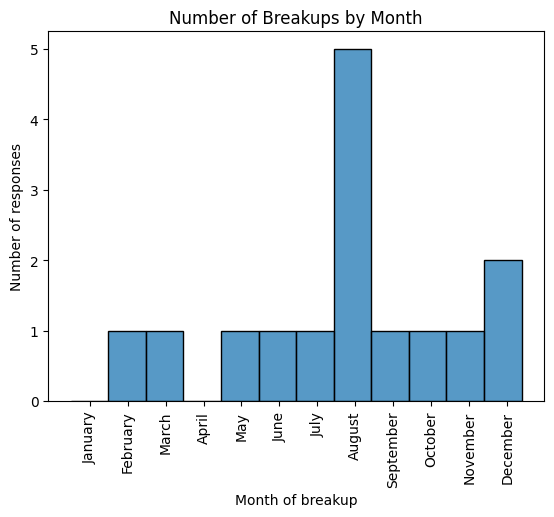

In [134]:
axes = sns.histplot(new_hate_data['breakup_start'], binwidth = .99, binrange = (1,12))
monthList = ['January', 'February', 'March', 'April','May','June', 'July','August','September', 'October', 'November', 'December']
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Month of breakup")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Breakups by Month")

Text(0.5, 1.0, 'Number of New Loves by Month')

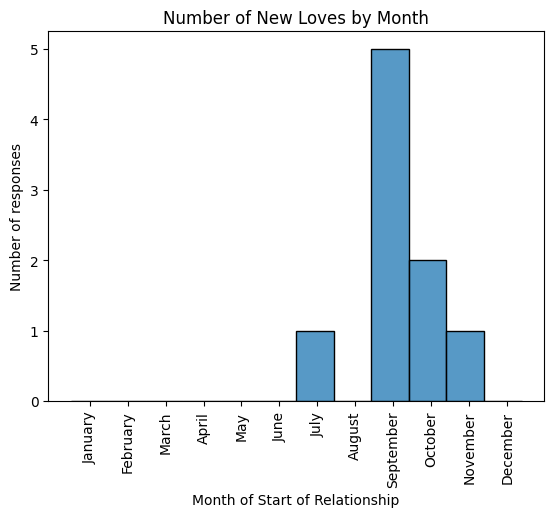

In [135]:
axes = sns.histplot(new_love_data['relationship_start'], binwidth = .99, binrange = (1,12))
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Month of Start of Relationship")
axes.set_ylabel("Number of responses")
axes.set_title("Number of New Loves by Month")

Text(0.5, 1.0, 'Number of Breakups by Length of Relationship')

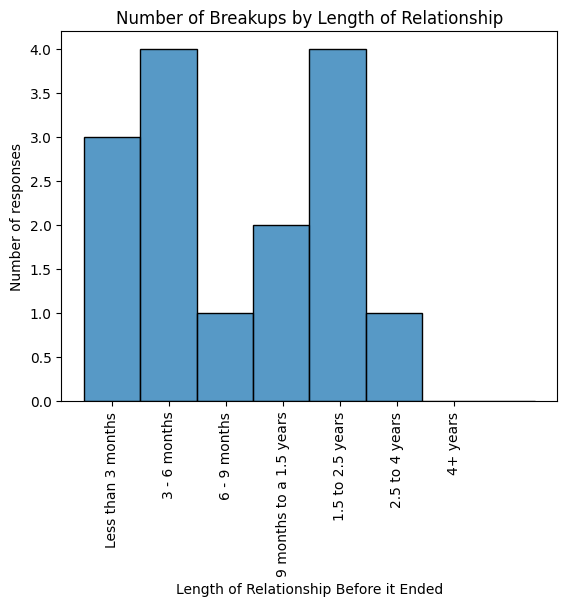

In [136]:
axes = sns.histplot(new_hate_data['breakup_length'], binwidth = .99, binrange = (1,8))
monthList = ['Less than 3 months', '3 - 6 months','6 - 9 months','9 months to a 1.5 years','1.5 to 2.5 years','2.5 to 4 years','4+ years']
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Length of Relationship Before it Ended")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Breakups by Length of Relationship")

Text(0.5, 1.0, 'Number of Relationships by Length of Relationship')

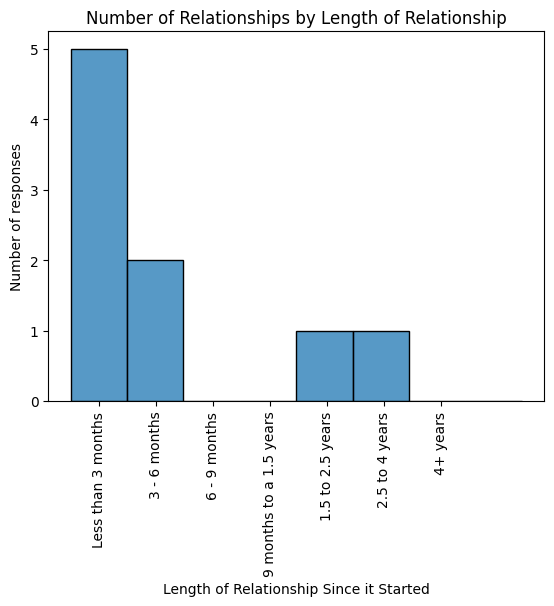

In [137]:
axes = sns.histplot(new_love_data['relationship_length'], binwidth = .99, binrange = (1,8))
monthList = ['Less than 3 months', '3 - 6 months','6 - 9 months','9 months to a 1.5 years','1.5 to 2.5 years','2.5 to 4 years','4+ years']
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Length of Relationship Since it Started")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Relationships by Length of Relationship")

Text(0.5, 1.0, 'Number of Breakups by How Satisfying the Breakup Was')

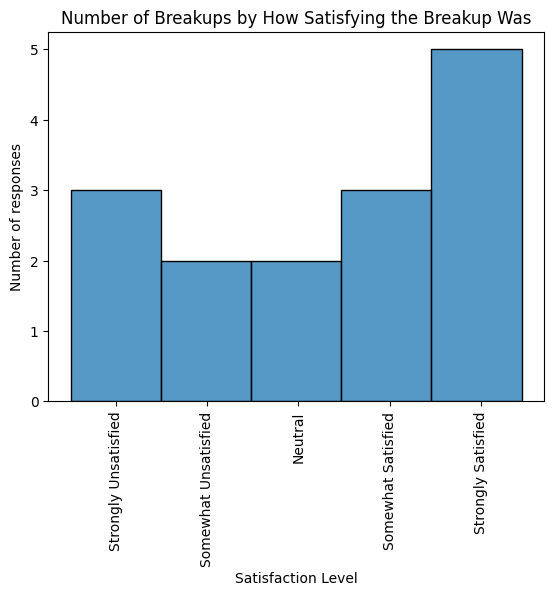

In [138]:
satisfaction_list = ['Strongly Unsatisfied', 'Somewhat Unsatisfied', 'Neutral','Somewhat Satisfied','Strongly Satisfied']
axes = sns.histplot(new_hate_data['breakup_satisfaction'], binwidth = .99, binrange = (1,5))
axes.set_xticks([1.5,2.5,3.5,4.5,5.5])
axes.set_xticklabels(satisfaction_list)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Satisfaction Level")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Breakups by How Satisfying the Breakup Was")

Text(0.5, 1.0, 'Number of Relationships by How Satisfying the New Love is')

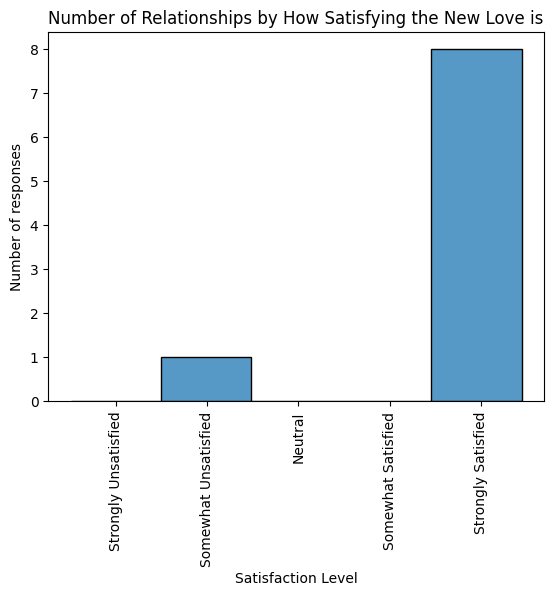

In [139]:
axes = sns.histplot(new_love_data['relationship_satisfaction'], binwidth = .99, binrange = (1,5))
axes.set_xticks([1.5,2.5,3.5,4.5,5.5])
axes.set_xticklabels(satisfaction_list)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Satisfaction Level")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Relationships by How Satisfying the New Love is")

---
# **ML Analysis**

These are all the imports we should need to start working with our data.

In [140]:
#Standard Imports
import sklearn
import string
import re # helps you filter urls
from IPython.display import display, Latex, Markdown
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk


This ML analysis will be completely implemented when we have the additional parameter of Age distributions to attempt to make predictions on some parameter based upon the others we collected. Perhaps how likely someone is to currently be in a relationship based upon the satisfaction of their previous breakup?

---
# **Reflections**
---
##1. What is the hardest part of the project that you’ve encountered so far?
####The hardest part of the project thusfar is finding ways to leverage the machine learning algorithms we learned within this class with our particular collected dataset. We believe that adding the age parameter will allow us to have a significant enough amount of parameters so as to allow manipulation using ML algorithms.
---
##2. What are your initial insights?
####The initial insights lead us to believe that, at least within this preliminary dataset, there is not a strong indicator for there being a particular time of year where people either break up, or decide to enter new relationships.
---
##3. Are there any concrete results you can show at this point? If not, why not?
####We certainly have results that we are proud to show given this stage of the project, but to make any *concrete* conclusions we would like to expand the response size of our survey significantly. We feel that considering any conclusions drawn from this preliminary amount of data would be disingenuous given the low sample size of the amount of data we currently have.
---
##4. Going forward, what are the current biggest problems you’re facing?
####The two main problems we have to solve going forward as previously mentioned is the need for additional data collection on a larger scale, and the need to find parameters that particularly lend themselves to application of possible ML algorithms. We feel confident in our ability to produce compelling visualizations when the data we collect is a bit more comprehensive without much additional effort.
---
##5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
####Whether or not we consider ourselves "on track" heavily depends on how successful our advertising campaign is for additional survey responses is. That will begin the Monday following the submission of the progress report, so we should have a little better of a handle on this question after next week. The other major time allocation concern is the aforementioned ML application, but we feel with the additional question when we broadcast the survey to the general public we will have the means to begin on that front.
---
##6. Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
####We believe that preliminary data exploration has shown us enough to say we are still interested in applying this analysis on a larger scale, and feel confident to proceed with the project. Aside from adding an additional question to increase the parameter count, we are excited to see what the result of data analysis on a larger scale yields, even if all that ends being is that both cuffing season and heartbreak row are simply myths of confirmation bias.

---
# **Next Steps**
There are two main phases of how our work takes shape over the next month...

---
##1.   Mass Data Collection
####We feel confident in our survey questions and that we have enough to work with with regards to exploratory statstics. There are enough distinct levers to work with when comparing statistics so that we will almost certainly be able to draw meaningful conclusions, and now the final roadblock is making sure those conclusions drawn are taken from a comprehensive amount of data, rather than the preliminary amount we have currently.
---
##2.   Finding Interesting Loci to Apply ML Algorithms
####This is the side of the project that is currently most underdeveloped, and thus we would like to put additional effort for some analysis that is a little more comprehensive than all the visualization options we already have available to us.


---
#The link to our group github submission is...
https://github.com/uic-ds-fall-2023/class-project-the-heart-breakers
